# Import Library

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
from sklearn import metrics

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import warnings
warnings.filterwarnings('ignore')

# Read The Data

In [7]:
dataset=pd.read_csv('/content/drive/MyDrive/workshop/part 1/heart.csv')
dataset.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
print("Data shape:",dataset.shape)

Data shape: (303, 14)


In [9]:
# iterating the columns 
for col in dataset.columns: 
    print(col)

age
sex
cp
trestbps
chol
fbs
restecg
thalach
exang
oldpeak
slope
ca
thal
target


# Create X and Y variables

In [10]:
X = dataset.iloc[:, 0:13].values
x = dataset.iloc[:, 0:13]
y = dataset.iloc[:, 13].values
y_name = dataset.iloc[:, 13:14]
print("X shape:",X.shape)
print("y shape:",y_name.shape)

X shape: (303, 13)
y shape: (303, 1)


In [11]:
# iterating the columns 
print("Attributes:\n")
for col in x.columns: 
    print(col)

print("\n")
print("Class:")
for col in y_name.columns: 
    print(col)

Attributes:

age
sex
cp
trestbps
chol
fbs
restecg
thalach
exang
oldpeak
slope
ca
thal


Class:
target


# Feature Scaling

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

# Cross Validation

# K Fold Cross Validation

In [13]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Logistic Regression

In [14]:
from sklearn.linear_model import LogisticRegression
classifier_lg = LogisticRegression(random_state = 0)

In [15]:
# ACCURACY 
accuracy  = cross_val_score(classifier_lg, X,y, cv =10)
print(accuracy)

[0.87096774 0.80645161 0.83870968 0.9        0.83333333 0.76666667
 0.86666667 0.83333333 0.7        0.7       ]


In [16]:
print(accuracy.mean())

0.8116129032258066


In [17]:
 # Precision 
from sklearn import metrics
pre = cross_val_score(classifier_lg, X, y, cv=10, scoring='precision_macro')
print(pre)

[0.9047619  0.81140351 0.83974359 0.89732143 0.83333333 0.79665072
 0.875      0.8492823  0.72222222 0.69909502]


In [18]:
print(pre.mean())

0.822881402438291


In [19]:
# Recall
from sklearn import metrics
rec = cross_val_score(classifier_lg, X, y, cv=10, scoring='recall_macro')
print(rec)

[0.85714286 0.79831933 0.83403361 0.90271493 0.82579186 0.77678571
 0.86160714 0.82589286 0.6875     0.69642857]


In [20]:
print(rec.mean())

0.8066216871363932


In [21]:
# F1 score 
from sklearn import metrics
f1 = cross_val_score(classifier_lg, X, y, cv=10, scoring='f1_macro')
print(f1)

[0.86403509 0.80128205 0.83597884 0.8989899  0.82857143 0.76430976
 0.86425339 0.82857143 0.6827262  0.6969697 ]


In [22]:
print(f1.mean())

0.8065687790522895


# Stratified K Fold Cross validation

In [23]:
# Import Library
from sklearn.model_selection import StratifiedKFold

In [24]:
# Print the X and Y Shape
X.shape, y.shape

((303, 13), (303,))

In [25]:
# Define K-fold 
skf = StratifiedKFold(n_splits=10,random_state=0, shuffle=False)

In [26]:
 skf.get_n_splits(X, y)

10

In [27]:
print(skf)

StratifiedKFold(n_splits=10, random_state=0, shuffle=False)


In [28]:
# Model Performane 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy   = []
precision  = []
recall     = []
f1_value   = []

for train_index, test_index in skf.split(X, y):
  #print("TRAIN:", train_index, "TEST:", test_index)
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]

  classifier_lg.fit(X_train,y_train)
  y_pred = classifier_lg.predict(X_test)

  ac = accuracy_score(y_test,y_pred)
  pre = precision_score(y_test,y_pred)
  rec = recall_score(y_test,y_pred)
  f1  = f1_score(y_test, y_pred)



  accuracy.append(ac)
  precision.append(pre)
  recall.append(rec)
  f1_value.append(f1)


In [29]:
print(accuracy)

[0.8709677419354839, 0.8064516129032258, 0.8387096774193549, 0.9, 0.8333333333333334, 0.7666666666666667, 0.8666666666666667, 0.8333333333333334, 0.7, 0.7]


In [30]:
print(precision)

[0.8095238095238095, 0.7894736842105263, 0.8333333333333334, 0.9375, 0.8333333333333334, 0.9090909090909091, 0.8333333333333334, 0.7894736842105263, 0.6666666666666666, 0.7058823529411765]


In [31]:
print(recall)

[1.0, 0.8823529411764706, 0.8823529411764706, 0.8823529411764706, 0.8823529411764706, 0.625, 0.9375, 0.9375, 0.875, 0.75]


In [32]:
print(f1_value)

[0.8947368421052632, 0.8333333333333333, 0.8571428571428571, 0.9090909090909091, 0.8571428571428571, 0.7407407407407406, 0.8823529411764706, 0.8571428571428572, 0.7567567567567567, 0.7272727272727272]


In [33]:
# import necessary packages
import matplotlib.pylab as plt
from scipy import interp
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve,auc
from sklearn.model_selection import StratifiedKFold
import matplotlib.patches as patches
import numpy as np # linear algebra
import pandas as pd
import seaborn as sn

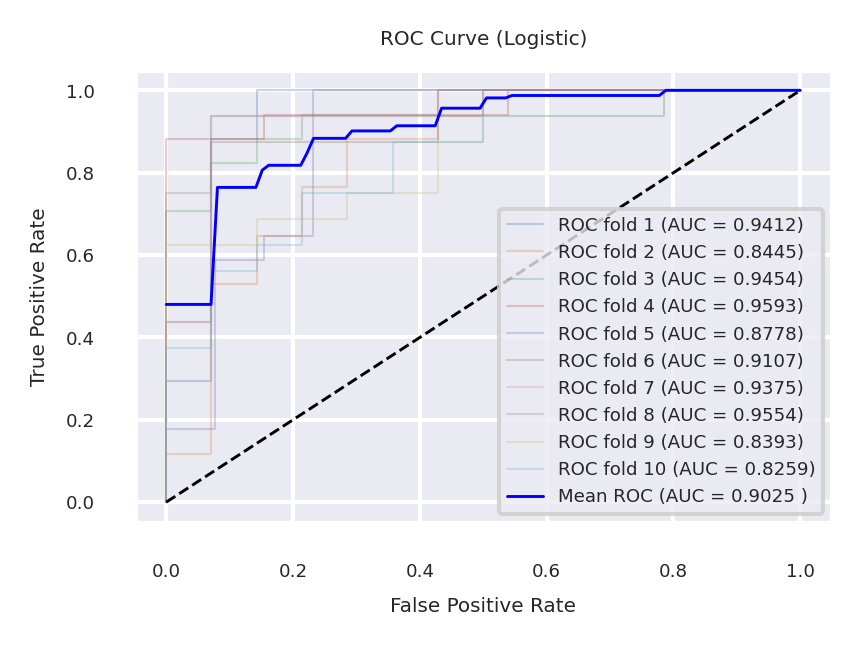

In [37]:
import seaborn as sn
random_state = np.random.RandomState(0)
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state = 0)
cv = StratifiedKFold(n_splits=10,shuffle=False)



tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)


plt.figure(figsize=(3,2), dpi=300)
sn.set(font_scale=.4)
i = 1
for train,test in cv.split(X,y):
    prediction =classifier_lg.fit(X[train],y[train]).predict_proba(X[test])
    fpr, tpr, t = roc_curve(y[test], prediction[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=.5, alpha=0.3, label='ROC fold %d (AUC = %0.4f)' % (i, roc_auc))
    i= i+1

plt.plot([0,1],[0,1],linestyle = '--',lw = .7,color = 'black')
sn.set_style("darkgrid")
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label='Mean ROC (AUC = %0.4f )' % (mean_auc),lw=.7, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Logistic)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()
